In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path = os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img')
classes = {'healthy':0, 'ALL':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes :
    pth = 'C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//'+cls
    for j in os.listdir(pth) :
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)


array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    130
1    130
dtype: int64

In [7]:
X.shape


(260, 200, 200)

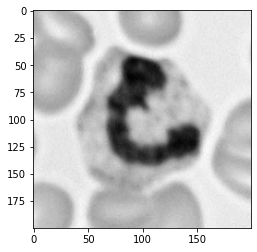

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(260, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((208, 40000), (52, 40000))

Features Scaling 

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

202 18
198 20
0.792156862745098 0.07058823529411765
0.7764705882352941 0.0784313725490196


In [13]:
from sklearn.decomposition import PCA

Features Selection  :PCA

In [14]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(208, 40000) (52, 40000)


Train model

In [15]:
from sklearn.svm import LinearSVC

In [16]:
sv = LinearSVC()
sv.fit(pca_train, ytrain)

C:\Users\Tulsi Chopade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

Evaluation 

In [17]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest ))

Training Score: 1.0
Testing Score: 0.5576923076923077


Prediction 

In [18]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 1,  3,  4,  6, 13, 15, 19, 22, 23, 24, 28, 29, 32, 34, 35, 37, 38,
        40, 45, 46, 47, 49, 50], dtype=int64),)

In [19]:
pred[12]

0

In [20]:
ytest[12]

0

Test Model 

In [21]:
dec = {0:'healthy' , 1:'ALL'}

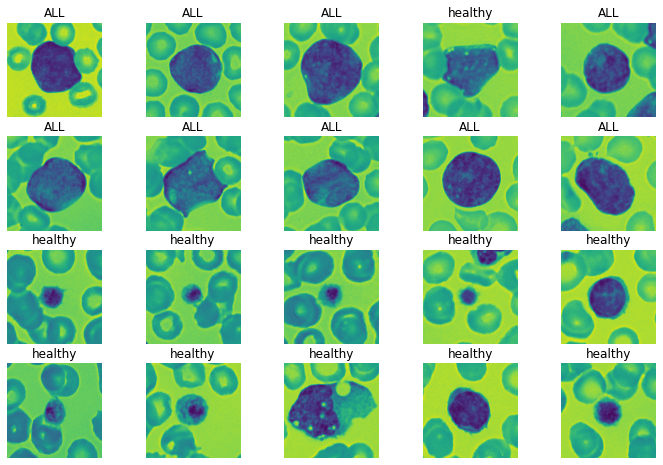

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//')
c=1
for i in os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//Test//')[:20]:
    plt.subplot(4,5,c)

    img = cv2.imread('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//Test//'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

In [23]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, pred))

Accuracy: 0.5576923076923077
